<a href="https://colab.research.google.com/github/yukyeongmin/testbinder/blob/main/02_production_ipynb%EC%9D%98_%EA%B0%9C%EC%9D%B8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 20.8MB/s 
     |████████████████████████████████| 194kB 53.9MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 1.2MB 27.6MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

# clean
To download images with Bing Image Search, sign up at [Microsoft Azure](https://azure.microsoft.com/en-us/services/cognitive-services/bing-web-search-api/) for a free account. You will be given a key, which you can copy and enter in a cell as follows (replacing 'XXX' with your key and executing it):

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', '55bab354eaf04e759547efb7440f68e6')

In [ ]:
results = search_images_bing(key, 'nike') 
#api를 가져가서 term으로 검색 & url list로 검색결과 반환
ims = results.attrgot('contentUrl')
len(ims)

In [ ]:
ims

In [ ]:
ims[1]

In [ ]:
import os
#os.mkdir('images')

#dest = 'images/nike.jpg'
#download_url(ims[1], dest)

In [ ]:
dest

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
plant_types = 'pot succulent','dessert cactus'
path = Path('test')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in plant_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}') #검색 키워드 적는 곳
        download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
fns = get_image_files(path)
fns

In [ ]:
failed = verify_images(fns) #이미지가 맞는지 확인
failed

In [ ]:
failed.map(Path.unlink); #delete

## From Data to DataLoaders

In [13]:
path = Path('images')############################

In [16]:
plant = DataBlock(########################
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)) 
#각 사진을 중심을 기준으로 128x128크기로 바꾸기

In [17]:
 dls = plant.dataloaders(path)###############

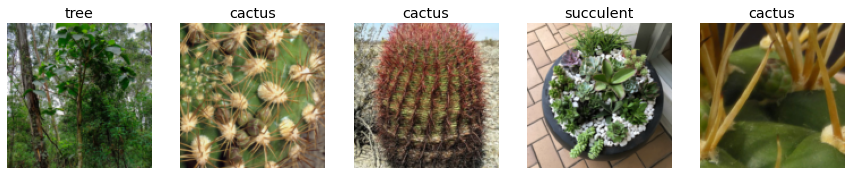

In [18]:
dls.valid.show_batch(max_n=5, nrows=1)

## Training Your Model, and Using It to Clean Your Data

In [ ]:
# plant = plant.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
# dls = plant.dataloaders(path, num_workders=0 )
# dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [19]:
plant = plant.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.7),
    batch_tfms=aug_transforms())
dls = plant.dataloaders(path, num_workers=0)

In [20]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.391557,0.387409,0.159763,00:31


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.572075,0.292388,0.106509,00:32
1,0.454140,0.298442,0.112426,00:32
2,0.353007,0.287495,0.088757,00:32
3,0.292202,0.278420,0.088757,00:32


In [ ]:
learn.fine_tune(2)

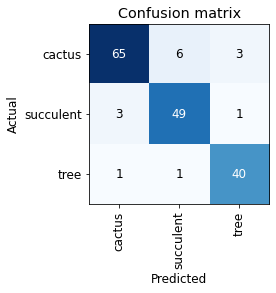

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix() 

In [ ]:
interp.plot_top_losses(10, nrows=4)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Turning Your Model into an Online Application

In [ ]:
learn.normalize(imagenet_status)

NameError: name 'imagenet_status' is not defined

In [22]:
learn.export()

In [23]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [24]:
learn_inf = load_learner(path/'export.pkl')
#learn_inf는 프로그램처럼 취급
#plant classifier

In [ ]:
path = Path()
learn_inf = load_learner(path/'export.pkl', cpu=True)
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [ ]:
def on_data_change(change):
    lbl_pred.value = ''
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [ ]:
btn_upload.observe(on_data_change, names=['data'])

In [ ]:
display(VBox([widgets.Label('Select an image'), btn_upload, out_pl, lbl_pred]))

### Creating a Notebook App from the Model

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
# btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])
img

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()

# 나중에 추가 시킬수 있음/ 현재는 비어있는 상태
out_pl

In [ ]:
with out_pl: display(img.to_thumb(128,128))
# 추가하겠다고 선언하면 위쪽 빈공간에 표시됨

In [ ]:
#pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
#lbl_pred = widgets.Label()
#lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
#lbl_pred

In [ ]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = 'Please choose an image'
lbl_pred

In [ ]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your picture!'), 
      btn_upload, btn_run, out_pl, lbl_pred])


### Turning Your Notebook into a Real App

In [ ]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

### Deploying your app

## How to Avoid Disaster

### Unforeseen Consequences and Feedback Loops

## Get Writing!

## Questionnaire

1. Provide an example of where the bear classification model might work poorly in production, due to structural or style differences in the training data.
1. Where do text models currently have a major deficiency?
1. What are possible negative societal implications of text generation models?
1. In situations where a model might make mistakes, and those mistakes could be harmful, what is a good alternative to automating a process?
1. What kind of tabular data is deep learning particularly good at?
1. What's a key downside of directly using a deep learning model for recommendation systems?
1. What are the steps of the Drivetrain Approach?
1. How do the steps of the Drivetrain Approach map to a recommendation system?
1. Create an image recognition model using data you curate, and deploy it on the web.
1. What is `DataLoaders`?
1. What four things do we need to tell fastai to create `DataLoaders`?
1. What does the `splitter` parameter to `DataBlock` do?
1. How do we ensure a random split always gives the same validation set?
1. What letters are often used to signify the independent and dependent variables?
1. What's the difference between the crop, pad, and squish resize approaches? When might you choose one over the others?
1. What is data augmentation? Why is it needed?
1. What is the difference between `item_tfms` and `batch_tfms`?
1. What is a confusion matrix?
1. What does `export` save?
1. What is it called when we use a model for getting predictions, instead of training?
1. What are IPython widgets?
1. When might you want to use CPU for deployment? When might GPU be better?
1. What are the downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC?
1. What are three examples of problems that could occur when rolling out a bear warning system in practice?
1. What is "out-of-domain data"?
1. What is "domain shift"?
1. What are the three steps in the deployment process?

### Further Research

1. Consider how the Drivetrain Approach maps to a project or problem you're interested in.
1. When might it be best to avoid certain types of data augmentation?
1. For a project you're interested in applying deep learning to, consider the thought experiment "What would happen if it went really, really well?"
1. Start a blog, and write your first blog post. For instance, write about what you think deep learning might be useful for in a domain you're interested in.